# EDA：資料分布介紹及繪圖

## 作業程式碼
- 本作業將請學員完成以下要求
    - 請從 Kaggle 平台找尋有興趣的資料集，建議資料筆數超過 10000 筆以上，且需為表格資料
    - 參考範例程式碼，使用 Matplotlib 繪製許多長條圖、散佈圖、盒鬚圖、折線圖等，並搭配圖表標題、X軸與Y軸標題

### 匯入所需套件

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 輸入資料

In [46]:
# 輸入資料
raw_data = pd.read_csv('train.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 繪製長條圖

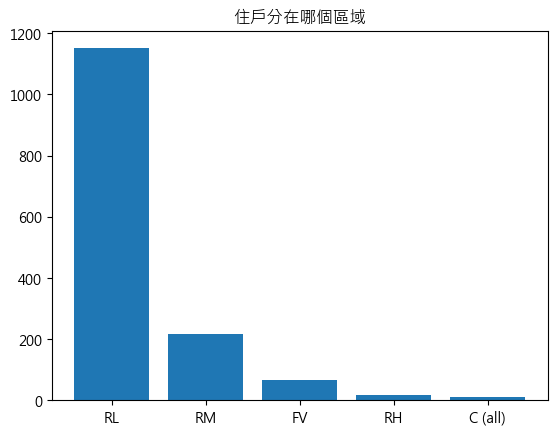

In [13]:
raw_data["MSZoning"] = raw_data["MSZoning"].astype("str")
VIP_frequency = raw_data["MSZoning"].value_counts()

plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]#支援中文繪圖
plt.bar(x = VIP_frequency.index, 
        height = VIP_frequency.values)
plt.title("住戶分在哪個區域")
plt.show()

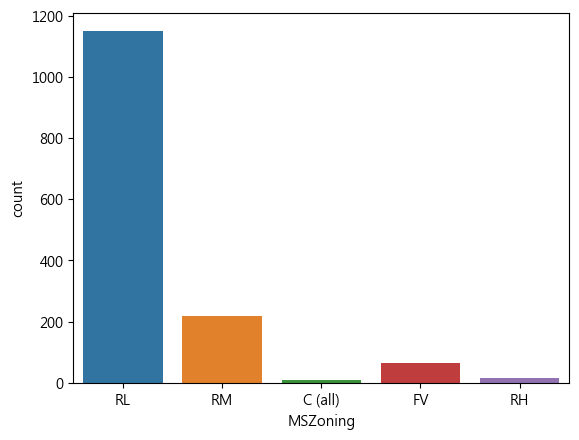

In [16]:
import seaborn as sns
sns.countplot(data = raw_data, x = "MSZoning")
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]#支援中文繪圖
plt.show()

### 繪製盒鬚圖

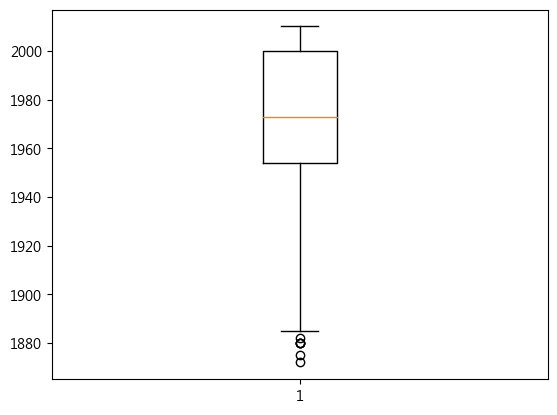

In [14]:
plt.boxplot(raw_data["YearBuilt"])
plt.show()

### 繪製散佈圖

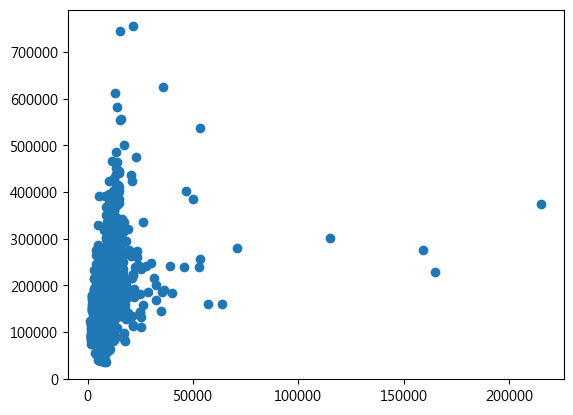

In [18]:
#土地面積和售價之間的關係
plt.scatter(x = raw_data["LotArea"], 
            y = raw_data["SalePrice"])
plt.show()

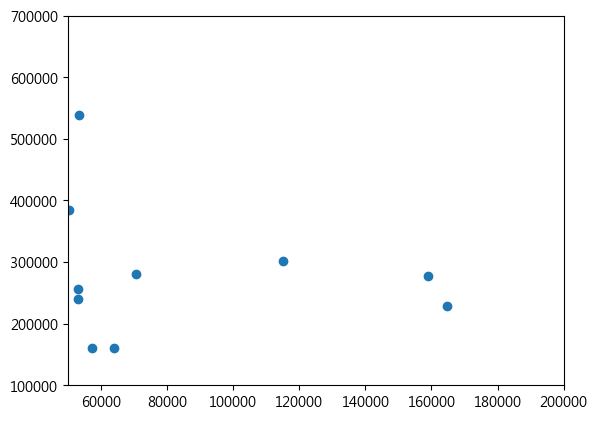

In [23]:
plt.scatter(x = raw_data["LotArea"], 
            y = raw_data["SalePrice"])
plt.xlim(50000,200000)
plt.ylim(100000,700000)
plt.show()

### 繪製折線圖

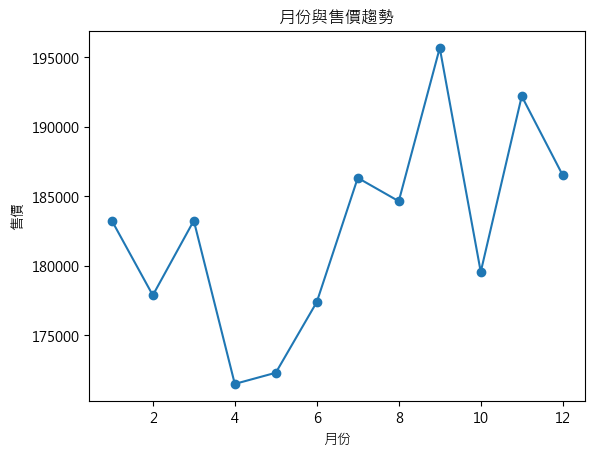

In [49]:
raw_data = raw_data.dropna(subset=['SalePrice'])
# 將 "MoSold" 列轉換為字符串
average_price_by_month = raw_data.groupby("MoSold")["SalePrice"].mean().reset_index()

# 繪製折線圖
plt.plot(average_price_by_month["MoSold"], average_price_by_month["SalePrice"], marker='o')
plt.xlabel('月份')
plt.ylabel('售價')
plt.title('月份與售價趨勢')
plt.show()